#Simple Linear Regression

<p>In given task we have to predict the percentage of marks expected by the student based upon the number of hours they studied.In this task only two variables are involved.</p>

In [23]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [24]:
#Import the data
url="http://bit.ly/w-data"
df=pd.read_csv(url)
df1=df
print("The data is imported successfully")
df1

The data is imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [25]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##Data Visualization

<p>Now we will plot our data which would give clear view of our dataset.</p>

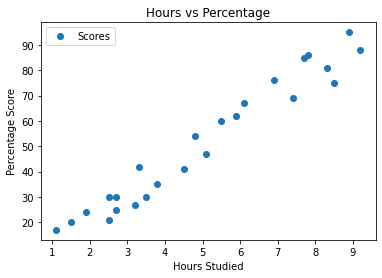

In [26]:
#Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

##Linear Regression Model

<p>We will prepare our data and split it into train and test set.</p>

In [27]:
#Splitting training and testing data
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values
X_train, X_test, y_train, y_test= train_test_split(X, y,train_size=0.80,test_size=0.20,random_state=0)

##Training our Model

In [28]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, y_train)
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_pred= lr.predict(X_train)
y_pred

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

##Training our Algorithm

<p>Now the spliting of our data into train and test sets is done.It's time to train our algorithm.</p>

In [30]:
reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training is complete.")

Training is complete.


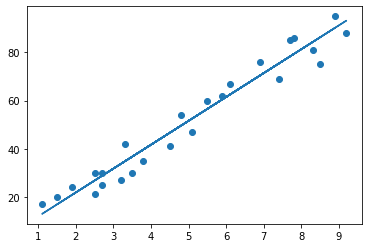

In [31]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

##Checking the Accuracy of Train and Test set

In [32]:
print('Test Score')
print(reg.score(X_test, y_test))
print('Training Score')
print(reg.score(X_train, y_train))

Test Score
0.9454906892105354
Training Score
0.9515510725211553


##Making Predictions

In [35]:
print(X_test) # Testing data - In Hours
y_pred = reg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [36]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


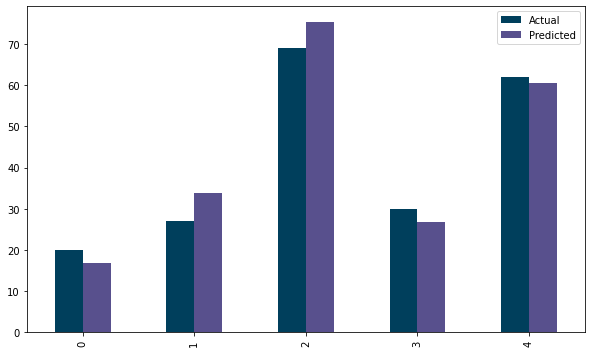

In [43]:
# Visualizing the Comparison
df.plot(kind='bar',figsize=(10,6),color=['#003f5c','#58508d'])
plt.show()

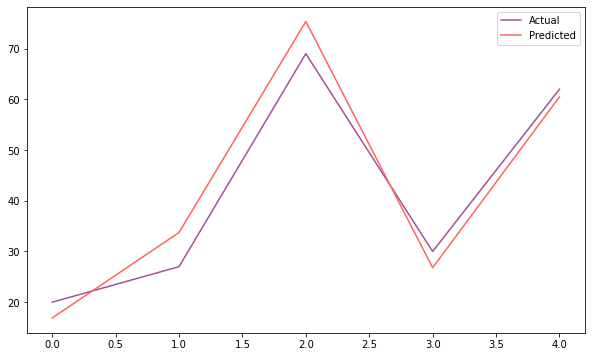

In [45]:
#Visualizing using line plot
df.plot(kind='line',figsize=(10,6),color=['#a05195','#ff6361'])
plt.show()

In [38]:
#Let's predict the score for 9.25 hpurs
print('Score of student who studied for 9.25 hours a dat', reg.predict([[9.25]]))

Score of student who studied for 9.25 hours a dat [93.69173249]


##Model Evaluation 

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [41]:
#Checking the efficiency of model
mean_sqa_error = mean_squared_error(y_test, y_pred)
mean_abs_error = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:",mean_sqa_error)
print("Mean absolute Error:",mean_abs_error)
print('R2 Score:', metrics.r2_score(y_test, y_pred)) 

Mean Squared Error: 21.598769307217456
Mean absolute Error: 4.183859899002982
